Sveučilište u Zagrebu  
Fakultet elektrotehnike i računarstva  
  
## Strojno učenje 1 2023/2024  
http://www.fer.unizg.hr/predmet/struce1

------------------------------

### Prva laboratorijska vježba: Linearna regresija

*Verzija: 1.0
Zadnji put ažurirano: 1. 10. 2021.*

(c) 2015-2023 Jan Šnajder, Domagoj Alagić 

Rok za predaju: **22. listopada 2023. u 23:59h**

------------------------------

### Pravila predaje
Predajom vježbe potvrđujete sljedeće točke:
1. Niste od drugoga primili pomoć pri rješavanju vježbe;
2. Atribuirali ste dijelove koda koji su preuzeti s interneta referencirajući ih u komentarima;
3. Niste koristili dijelove koda s interneta koji su specifični za laboratorijsku vježbu;
4. Niste koristili UI-asistente za kodiranje kao npr. GitHub Copilot (uključivo alate generativne UI, kao što je ChatGPT).

**Povreda bilo kojeg od gornjih pravila smatra se prekršajem te povlači akademske sankcije.**

### Upute

Prva laboratorijska vježba sastoji se od sedam zadataka. U nastavku slijedite upute navedene u ćelijama s tekstom. Rješavanje vježbe svodi se na **dopunjavanje ove bilježnice**: umetanja ćelije ili više njih **ispod** teksta zadatka, pisanja odgovarajućeg kôda te evaluiranja ćelija. 

Osigurajte da u potpunosti **razumijete** kôd koji ste napisali. Kod predaje vježbe, morate biti u stanju na zahtjev asistenta (ili demonstratora) preinačiti i ponovno evaluirati Vaš kôd. Nadalje, morate razumjeti teorijske osnove onoga što radite, u okvirima onoga što smo obradili na predavanju. Ispod nekih zadataka možete naći i pitanja koja služe kao smjernice za bolje razumijevanje gradiva (**nemojte pisati** odgovore na pitanja u bilježnicu). Stoga se nemojte ograničiti samo na to da riješite zadatak, nego slobodno eksperimentirajte. To upravo i jest svrha ovih vježbi.

Vježbe trebate raditi **samostalno**. Možete se konzultirati s drugima o načelnom načinu rješavanja, ali u konačnici morate sami odraditi vježbu. U protivnome vježba nema smisla.

In [469]:
# Učitaj osnovne biblioteke...
import numpy as np
import sklearn
import matplotlib.pyplot as plt
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


C:\Users\38599\AppData\Roaming\Python\Python310\site-packages\IPython\core\magics\pylab.py:162: UserWarning: pylab import has clobbered these variables: ['poly', 'f']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


### 1. Jednostavna regresija

Zadan je skup primjera $\mathcal{D}=\{(x^{(i)},y^{(i)})\}_{i=1}^4 = \{(0,4),(1,1),(2,2),(4,5)\}$. Primjere predstavite matricom $\mathbf{X}$ dimenzija $N\times n$ (u ovom slučaju $4\times 1$) i vektorom oznaka $\textbf{y}$, dimenzija $N\times 1$ (u ovom slučaju $4\times 1$), na sljedeći način:


In [470]:
X = np.array([[0],[1],[2],[4]])
y = np.array([4,1,2,5])
print(X)
print(y)

[[0]
 [1]
 [2]
 [4]]
[4 1 2 5]


### (a)

Proučite funkciju [`PolynomialFeatures`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) iz biblioteke `sklearn` i upotrijebite je za generiranje matrice dizajna $\mathbf{\Phi}$ koja ne koristi preslikavanje u prostor više dimenzije (samo će svakom primjeru biti dodane *dummy* jedinice; $m=n+1$).


In [471]:
from sklearn.preprocessing import PolynomialFeatures
# Vaš kôd ovdje
poly = PolynomialFeatures(degree=1, include_bias=True)
X_transformed = poly.fit_transform(X)
print(X_transformed)

[[1. 0.]
 [1. 1.]
 [1. 2.]
 [1. 4.]]


### (b)

Upoznajte se s modulom [`linalg`](http://docs.scipy.org/doc/numpy/reference/routines.linalg.html). Izračunajte težine $\mathbf{w}$ modela linearne regresije kao $\mathbf{w}=(\mathbf{\Phi}^\intercal\mathbf{\Phi})^{-1}\mathbf{\Phi}^\intercal\mathbf{y}$. Zatim se uvjerite da isti rezultat možete dobiti izračunom pseudoinverza $\mathbf{\Phi}^+$ matrice dizajna, tj. $\mathbf{w}=\mathbf{\Phi}^+\mathbf{y}$, korištenjem funkcije [`pinv`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.pinv.html).

In [472]:
from numpy import linalg
# Vaš kôd ovdje
pseudoinverz = np.matmul(linalg.inv(np.matmul(X_transformed.transpose(), X_transformed)), X_transformed.transpose())
w_first_instance = np.matmul(pseudoinverz, y)
print(w_first_instance)
w_second_instance = np.matmul(linalg.pinv(X_transformed), y)
print(w_second_instance)


[2.2        0.45714286]
[2.2        0.45714286]


Radi jasnoće, u nastavku je vektor $\mathbf{x}$ s dodanom *dummy* jedinicom $x_0=1$ označen kao $\tilde{\mathbf{x}}$.

### (c)

Prikažite primjere iz $\mathcal{D}$ i funkciju $h(\tilde{\mathbf{x}})=\mathbf{w}^\intercal\tilde{\mathbf{x}}$. Izračunajte pogrešku učenja prema izrazu $E(h|\mathcal{D})=\frac{1}{2}\sum_{i=1}^N(\tilde{\mathbf{y}}^{(i)} - h(\tilde{\mathbf{x}}^{(i)}))^2$. Možete koristiti funkciju srednje kvadratne pogreške [`mean_squared_error`]( http://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html) iz modula [`sklearn.metrics`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics).

**Q:** Gore definirana funkcija pogreške $E(h|\mathcal{D})$ i funkcija srednje kvadratne pogreške nisu posve identične. U čemu je razlika? Koja je "realnija"?

In [473]:
from sklearn.metrics import mean_squared_error
# Vaš kôd ovdje
print("Primjeri: ")
for row in X_transformed:
    print(row)
print("--------")
print("Hipoteza: h(x)=W^T * x")
print("--------")
preds = []
true = y
for row in X_transformed:
    preds.append(np.matmul(w_second_instance.transpose(), row))
error = mean_squared_error(true, preds)
print("Srednja kvadratna pogreška iznosi: ", error)

Primjeri: 
[1. 0.]
[1. 1.]
[1. 2.]
[1. 4.]
--------
Hipoteza: h(x)=W^T * x
--------
Srednja kvadratna pogreška iznosi:  2.042857142857143


### (d)

Uvjerite se da za primjere iz $\mathcal{D}$ težine $\mathbf{w}$ ne možemo naći rješavanjem sustava $\mathbf{w}=\mathbf{\Phi}^{-1}\mathbf{y}$, već da nam doista treba pseudoinverz.

**Q:** Zašto je to slučaj? Bi li se problem mogao riješiti preslikavanjem primjera u višu dimenziju? Ako da, bi li to uvijek funkcioniralo, neovisno o skupu primjera $\mathcal{D}$? Pokažite na primjeru.

In [474]:
# Vaš kôd ovdje
#dolazi do LinAlgErrora
#w = np.matmul(linalg.inv(X_transformed), y)

### (e) 

Proučite klasu [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) iz modula [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model). Provjerite jesu li težine koje izračunava ta funkcija (dostupne pomoću atributa `coef_` i `intercept_`) jednake onima koje ste izračunali gore. Ako nisu, prilagodite kôd tako da jest.

**NB:** Obratite pozornost na to kako klase [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) i [`PolynomialFeatures`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) koriste pomak i osigurajte da ga ne dodajete više puta.

Izračunajte predikcije modela (metoda `predict`) i uvjerite se da je pogreška učenja identična onoj koju ste ranije izračunali.

In [475]:
from sklearn.linear_model import LinearRegression
# Vaš kôd ovdje
reg = LinearRegression()
reg.fit(X_transformed,y)
print("w0: ", reg.intercept_)
print("w1: ", reg.coef_[1])
#težine su identične kao u zadatku pod c)
preds = reg.predict(X_transformed)
new_mean_squared_error = mean_squared_error(true, preds)
print(new_mean_squared_error)
#error je identičan kao u zadatku pod c)


w0:  2.2
w1:  0.45714285714285713
2.042857142857143


### 2. Polinomijalna regresija i utjecaj šuma

### (a)

Razmotrimo sada regresiju na većem broju primjera. Definirajte funkciju `make_labels(X, f, noise=0)` koja uzima matricu neoznačenih primjera $\mathbf{X}_{N\times n}$ te generira vektor njihovih oznaka $\mathbf{y}_{N\times 1}$. Oznake se generiraju kao $y^{(i)} = f(x^{(i)})+\mathcal{N}(0,\sigma^2)$, gdje je $f:\mathbb{R}^n\to\mathbb{R}$ stvarna funkcija koja je generirala podatke (koja nam je u stvarnosti nepoznata), a $\sigma$ je standardna devijacija Gaussovog šuma, definirana parametrom `noise`. Za generiranje šuma možete koristiti funkciju [`numpy.random.normal`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html). 

Generirajte skup za učenje od $N=50$ primjera uniformno distribuiranih u intervalu $[-5,5]$ pomoću funkcije $f(x) = 5 + x -2 x^2 -5 x^3$ uz šum  $\sigma=200$:

In [476]:
from numpy.random import normal
def make_labels(X, f, noise=0):
    # Vaš kôd ovdje
    skup_oznaka = []
    for row in X:
        skup_oznaka.append(f(row) + normal(scale=noise))
    return skup_oznaka

In [477]:
def make_instances(x1, x2, N) :
    return np.array([np.array([x]) for x in np.linspace(x1,x2,N)])

In [478]:
# Vaš kôd ovdje
def f(x):
    return 5 + x -2*x**2 - 5*x**3

skup_za_ucenje = make_instances(-5,5,50)
skup_oznaka = make_labels(skup_za_ucenje, f, noise=200)

Prikažite taj skup funkcijom [`scatter`](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter).

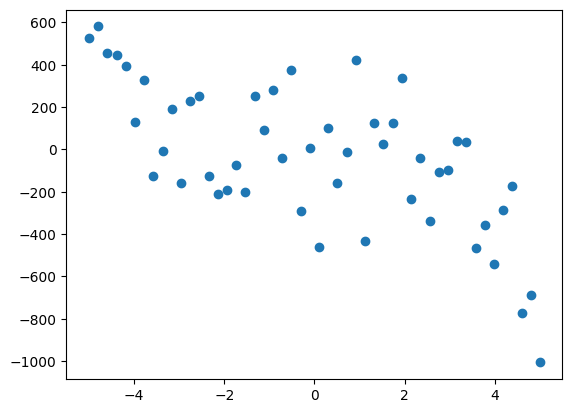

In [479]:
# Vaš kôd ovdje
plt.scatter(skup_za_ucenje, skup_oznaka)

### (b)

Trenirajte model polinomijalne regresije stupnja $d=3$. Na istom grafikonu prikažite naučeni model $h(\mathbf{x})=\mathbf{w}^\intercal\tilde{\mathbf{x}}$ i primjere za učenje. Izračunajte pogrešku učenja modela.

Srednja kvadratna pogreška iznosi:  42177.514068050084


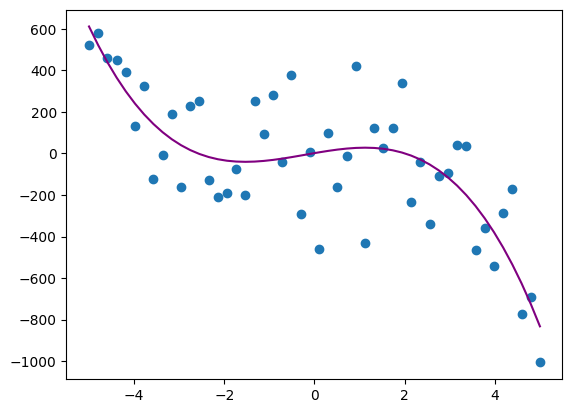

In [480]:
# Vaš kôd ovdje
poly2 = PolynomialFeatures(degree=3, include_bias=True)
skup_za_ucenje_transformiran = poly2.fit_transform(skup_za_ucenje)
model2b = LinearRegression()
model2b.fit(skup_za_ucenje_transformiran,skup_oznaka)
predikcije2b = model2b.predict(skup_za_ucenje_transformiran)

pogreška2b = mean_squared_error(skup_oznaka, predikcije2b)
print("Srednja kvadratna pogreška iznosi: ", pogreška2b)

plt.scatter(skup_za_ucenje, skup_oznaka)
plt.plot(skup_za_ucenje, predikcije2b, color='purple')






### 3. Odabir modela

### (a)

Na skupu podataka iz zadatka 2 trenirajte pet modela linearne regresije $\mathcal{H}_d$ različite složenosti, gdje je $d$ stupanj polinoma, $d\in\{1,3,5,10,20\}$. Prikažite na istome grafikonu skup za učenje i funkcije $h_d(\mathbf{x})$ za svih pet modela (preporučujemo koristiti `plot` unutar `for` petlje). Izračunajte pogrešku učenja svakog od modela.

**Q:** Koji model ima najmanju pogrešku učenja i zašto?

Srednja kvadratna pogreška iznosi za hiperparametar d=1 iznosi 64606.49311320696: 
Srednja kvadratna pogreška iznosi za hiperparametar d=3 iznosi 42177.514068050084: 
Srednja kvadratna pogreška iznosi za hiperparametar d=5 iznosi 41635.776561931154: 
Srednja kvadratna pogreška iznosi za hiperparametar d=10 iznosi 39943.497279594645: 
Srednja kvadratna pogreška iznosi za hiperparametar d=20 iznosi 25544.13081808891: 


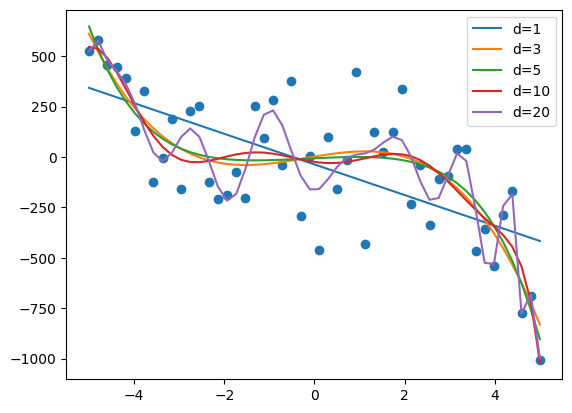

In [481]:
# Vaš kôd ovdje
plt.scatter(skup_za_ucenje, skup_oznaka)
for d in [1,3,5,10,20]:
    poly3a = PolynomialFeatures(degree=d, include_bias=True)
    skup_za_ucenje3a = poly3a.fit_transform(skup_za_ucenje)

    model3a = LinearRegression()
    model3a.fit(skup_za_ucenje3a, skup_oznaka)
    predikcije3a = model3a.predict(skup_za_ucenje3a)

    pogreska3a = mean_squared_error(skup_oznaka, predikcije3a)
    print("Srednja kvadratna pogreška iznosi za hiperparametar d={} iznosi {}: ".format(d,pogreska3a))

    plt.plot(skup_za_ucenje3a[:,1], predikcije3a, label="d={}".format(d))
plt.legend()
plt.show()

### (b)

Razdvojite skup primjera iz zadatka 2 pomoću funkcije [`model_selection.train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) na skup za učenja i skup za ispitivanje u omjeru 1:1. Prikažite na jednom grafikonu pogrešku učenja i ispitnu pogrešku za modele polinomijalne regresije $\mathcal{H}_d$, sa stupnjem polinoma $d$ u rasponu $d\in [1,2,\ldots,20]$. Budući da kvadratna pogreška brzo raste za veće stupnjeve polinoma, umjesto da iscrtate izravno iznose pogrešaka, iscrtajte njihove logaritme.

**NB:** Podjela na skupa za učenje i skup za ispitivanje mora za svih dvadeset modela biti identična.

**Q:** Je li rezultat u skladu s očekivanjima? Koji biste model odabrali i zašto?

**Q:** Pokrenite iscrtavanje više puta. U čemu je problem? Bi li problem bio jednako izražen kad bismo imali više primjera? Zašto?

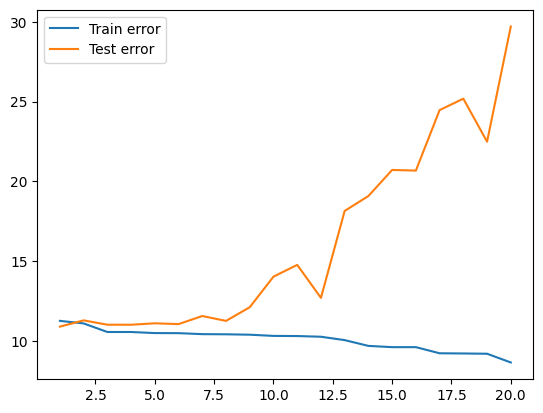

In [482]:
from sklearn.model_selection import train_test_split
# Vaš kôd ovdje
import math
X_train, X_test, y_train, y_test = train_test_split(skup_za_ucenje, skup_oznaka, test_size=0.5)
errors_train=[]
errors_test=[]
hyperparameters = np.arange(1,21)
for d in range(1,21):
    poly3b = PolynomialFeatures(degree=d, include_bias=True)
    X_train_transformed = poly3b.fit_transform(X_train)
    X_test_transformed = poly3b.fit_transform(X_test)

    model3btrain = LinearRegression()
    model3btrain.fit(X_train_transformed, y_train)
    predikcije_train = model3btrain.predict(X_train_transformed)
    
    predikcije_test = model3btrain.predict(X_test_transformed)

    pogreska_train = mean_squared_error(y_train, predikcije_train)
    pogreska_test = mean_squared_error(y_test, predikcije_test)
    
    errors_train.append(math.log(pogreska_train))
    errors_test.append(math.log(pogreska_test))

plt.plot(hyperparameters, errors_train, label="Train error")
plt.plot(hyperparameters, errors_test, label="Test error")
plt.legend()
plt.show()



### (c)

Točnost modela ovisi o (1) njegovoj složenosti (stupanj $d$ polinoma), (2) broju primjera $N$, i (3) količini šuma. Kako biste to analizirali, nacrtajte grafikone pogrešaka kao u 3b, ali za različit $N\in$ (trećina, dvije trećine, sve) i količine šuma $\sigma\in\{100,200,500\}$ (ukupno 9 grafikona). Upotrijebite funkciju [`subplots`](http://matplotlib.org/examples/pylab_examples/subplots_demo.html) kako biste pregledno posložili grafikone u tablicu $3\times 3$. Podatci se generiraju na isti način kao u zadatku 2.

**NB:** Pobrinite se da svi grafikoni budu generirani nad usporedivim skupovima podataka, na sljedeći način. Generirajte najprije svih 1000 primjera, podijelite ih na skupove za učenje i skupove za ispitivanje (dva skupa od po 500 primjera). Zatim i od skupa za učenje i od skupa za ispitivanje načinite tri različite verzije, svaka s drugačijom količinom šuma (ukupno 2x3=6 verzija podataka). Kako bi simulirali veličinu skupa podataka, od tih dobivenih 6 skupova podataka uzorkujte trećinu, dvije trećine i sve podatke. Time ste dobili 18 skupova podataka -- skup za učenje i za testiranje za svaki od devet grafova.

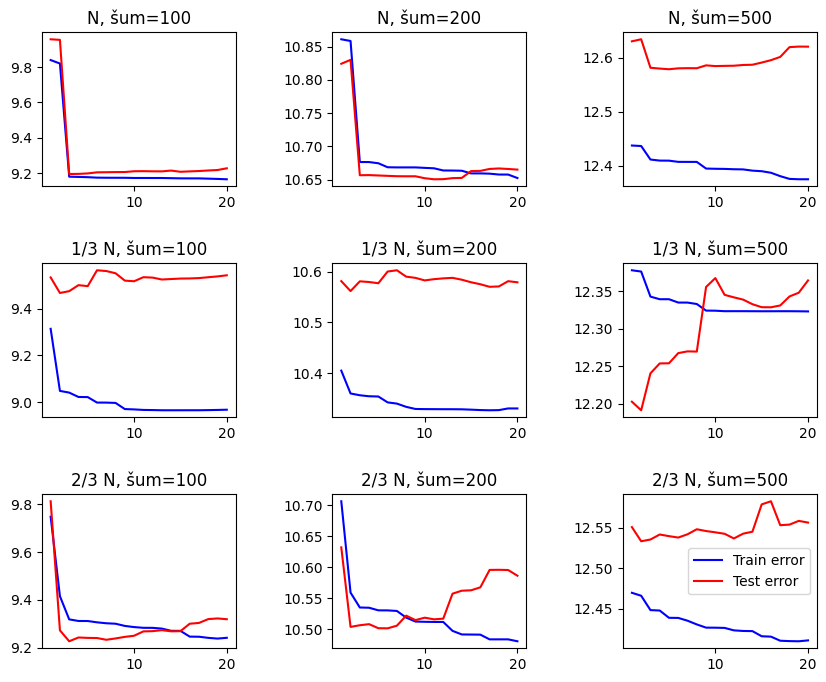

In [483]:
# Vaš kôd ovdje
def set_title(x):
    if x==0:
        return "N, šum=100"
    elif x==1:
        return "N, šum=200"
    elif x==2:
        return "N, šum=500"
    elif x==3:
        return "1/3 N, šum=100"
    elif x==4:
        return "1/3 N, šum=200"
    elif x==5:
        return "1/3 N, šum=500"
    elif x==6:
        return "2/3 N, šum=100"
    elif x==7:
        return "2/3 N, šum=200"
    elif x==8:
        return "2/3 N, šum=500"
    else:
        return "Pogreška"


primjeri_sve = make_instances(-5,5,1000)


primjeri_trecina = primjeri_sve[:(len(primjeri_sve)//3)]

primjeri_dvije_trecine = primjeri_sve[:(2* len(primjeri_sve) // 3)]


oznake_sve_100 = make_labels(primjeri_sve, f, noise=100)
oznake_sve_200 = make_labels(primjeri_sve, f, noise=200)
oznake_sve_500 = make_labels(primjeri_sve, f, noise=500)


oznake_trecina_100 = make_labels(primjeri_trecina, f, noise=100)
oznake_trecina_200 = make_labels(primjeri_trecina, f, noise=200)
oznake_trecina_500 = make_labels(primjeri_trecina, f, noise=500)


oznake_dvije_trecine_100 = make_labels(primjeri_dvije_trecine, f, noise=100)
oznake_dvije_trecine_200 = make_labels(primjeri_dvije_trecine, f, noise=200)
oznake_dvije_trecine_500 = make_labels(primjeri_dvije_trecine, f, noise=500)


polje = []

primjeri_sve_100_train, primjeri_sve_100_test, oznake_sve_100_train, oznake_sve_100_test = train_test_split(primjeri_sve, oznake_sve_100, test_size=0.5)
primjeri_sve_200_train, primjeri_sve_200_test, oznake_sve_200_train, oznake_sve_200_test = train_test_split(primjeri_sve, oznake_sve_200, test_size=0.5)
primjeri_sve_500_train, primjeri_sve_500_test, oznake_sve_500_train, oznake_sve_500_test = train_test_split(primjeri_sve, oznake_sve_500, test_size=0.5)
polje.append(train_test_split(primjeri_sve, oznake_sve_100, test_size=0.5))
polje.append(train_test_split(primjeri_sve, oznake_sve_200, test_size=0.5))
polje.append(train_test_split(primjeri_sve, oznake_sve_500, test_size=0.5))

primjeri_trecina_100_train, primjeri_trecina_100_test, oznake_trecina_100_train, oznake_trecina_100_test = train_test_split(primjeri_trecina, oznake_trecina_100, test_size=0.5)
primjeri_trecina_200_train, primjeri_trecina_200_test, oznake_trecina_200_train, oznake_trecina_200_test = train_test_split(primjeri_trecina, oznake_trecina_200, test_size=0.5)
primjeri_trecina_500_train, primjeri_trecina_500_test, oznake_trecina_500_train, oznake_trecina_500_test = train_test_split(primjeri_trecina, oznake_trecina_500, test_size=0.5)
polje.append(train_test_split(primjeri_trecina, oznake_trecina_100, test_size=0.5))
polje.append(train_test_split(primjeri_trecina, oznake_trecina_200, test_size=0.5))
polje.append(train_test_split(primjeri_trecina, oznake_trecina_500, test_size=0.5))


primjeri_dvije_trecine_100_train, primjeri_dvije_trecine_100_test, oznake_dvije_trecine_100_train, oznake_dvije_trecine_100_test = train_test_split(primjeri_dvije_trecine, oznake_dvije_trecine_100, test_size=0.5)
primjeri_dvije_trecine_200_train, primjeri_dvije_trecine_200_test, oznake_dvije_trecine_200_train, oznake_dvije_trecine_200_test = train_test_split(primjeri_dvije_trecine, oznake_dvije_trecine_200, test_size=0.5)
primjeri_dvije_trecine_500_train, primjeri_dvije_trecine_500_test, oznake_dvije_trecine_500_train, oznake_dvije_trecine_500_test = train_test_split(primjeri_dvije_trecine, oznake_dvije_trecine_500, test_size=0.5)

polje.append(train_test_split(primjeri_dvije_trecine, oznake_dvije_trecine_100, test_size=0.5))
polje.append(train_test_split(primjeri_dvije_trecine, oznake_dvije_trecine_200, test_size=0.5))
polje.append(train_test_split(primjeri_dvije_trecine, oznake_dvije_trecine_500, test_size=0.5))


fig, axs = plt.subplots(3, 3, figsize=(10, 8))
plt.subplots_adjust(wspace=0.5, hspace=0.5)

indeksi = [[0,0],[0,1],[0,2],[1,0],[1,1],[1,2],[2,0],[2,1],[2,2]]
brojac = 0

for element in polje:

    errors_train_3c = []
    errors_test_3c = []

    for d in range(1,21):
        poly3c = PolynomialFeatures(degree=d, include_bias=True)
        X_train_3c = poly3c.fit_transform(element[0])
        X_test_3c= poly3c.fit_transform(element[1])

        model3c = LinearRegression()
        model3c.fit(X_train_3c, element[2])

        predikcije_train = model3c.predict(X_train_3c)
        predikcije_test = model3c.predict(X_test_3c)

        pogreska_train = mean_squared_error(element[2], predikcije_train)
        pogreska_test = mean_squared_error(element[3], predikcije_test)

        
        errors_train_3c.append(math.log(pogreska_train))
        errors_test_3c.append(math.log(pogreska_test))

    axs[indeksi[brojac][0], indeksi[brojac][1]].plot(hyperparameters, errors_train_3c, label="Train error", color="blue")
    axs[indeksi[brojac][0], indeksi[brojac][1]].plot(hyperparameters, errors_test_3c, label="Test error", color="red")
    title = set_title(brojac)
    axs[indeksi[brojac][0], indeksi[brojac][1]].set_title(title)


    brojac+=1

plt.legend()
plt.show()




    





***Q:*** Jesu li rezultati očekivani? Obrazložite.

### 4. Regularizirana regresija

### (a)

U gornjim eksperimentima nismo koristili **regularizaciju**. Vratimo se najprije na primjer iz zadatka 1. Na primjerima iz tog zadatka izračunajte težine $\mathbf{w}$ za polinomijalni regresijski model stupnja $d=3$ uz L2-regularizaciju (tzv. *ridge regression*), prema izrazu $\mathbf{w}=(\mathbf{\Phi}^\intercal\mathbf{\Phi}+\lambda\mathbf{I})^{-1}\mathbf{\Phi}^\intercal\mathbf{y}$. Napravite izračun težina za regularizacijske faktore $\lambda=0$, $\lambda=1$ i $\lambda=10$ te usporedite dobivene težine.

**Q:** Kojih je dimenzija matrica koju treba invertirati?

**Q:** Po čemu se razlikuju dobivene težine i je li ta razlika očekivana? Obrazložite.

In [484]:
# Vaš kôd ovdje
poly4a = PolynomialFeatures(degree=3, include_bias=True)
design_m_4a = poly4a.fit_transform(X)

#lambda = 0
w_4a0 = np.matmul(np.matmul(np.linalg.inv(np.matmul(design_m_4a.transpose(), design_m_4a)), design_m_4a.transpose()), y)
#lambda = 1
lambda_matrix1 = np.array([
    [0, 0, 0, 0],
    [0, 1, 0, 0],
    [0, 0, 1, 0],
    [0, 0, 0, 1]
])
w_4a1 = np.matmul(np.matmul(np.linalg.inv(np.matmul(design_m_4a.transpose(), design_m_4a) + lambda_matrix1), design_m_4a.transpose()), y)
#lambda = 10
lambda_matrix10 = np.array([
    [0, 0, 0, 0],
    [0, 10, 0, 0],
    [0, 0, 10, 0],
    [0, 0, 0, 10]
])
w_4a10 = np.matmul(np.matmul(np.linalg.inv(np.matmul(design_m_4a.transpose(), design_m_4a) + lambda_matrix10), design_m_4a.transpose()), y)
print("lambda=0")
print(w_4a0)
print("lambda=1")
print(w_4a1)
print("lambda=10")
print(w_4a10)



lambda=0
[ 4.         -5.91666667  3.375      -0.45833333]
lambda=1
[ 3.05696145 -0.69079365 -0.2831746   0.1445805 ]
lambda=10
[ 2.49444184 -0.15897295 -0.13423067  0.0815601 ]


### (b)

Proučite klasu [`Ridge`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge) iz modula [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model), koja implementira L2-regularizirani regresijski model. Parametar $\alpha$ odgovara parametru $\lambda$. Primijenite model na istim primjerima kao u prethodnom zadatku i ispišite težine $\mathbf{w}$ (atributi `coef_` i `intercept_`). Ponovno, pripazite na pomak.

**Q:** Jesu li težine identične onima iz zadatka 4a? Ako nisu, objasnite zašto je to tako i kako biste to popravili.

In [485]:
from sklearn.linear_model import Ridge
# Vaš kôd ovdje

clf1 = Ridge(alpha=0.0)
clf1.fit(design_m_4a[:,1:], y)
clf2 = Ridge(alpha=1.0)
clf2.fit(design_m_4a[:,1:], y)

clf3 = Ridge(alpha=10.0)
clf3.fit(design_m_4a[:,1:], y)

print("Lambda = 0")
print("w0: ", clf1.intercept_)
print("w1: ", clf1.coef_[0])
print("w2: ", clf1.coef_[1])
print("w3: ", clf1.coef_[2])


print("Lambda = 1")
print("w0: ", clf2.intercept_)
print("w1: ", clf2.coef_[0])
print("w2: ", clf2.coef_[1])
print("w3: ", clf2.coef_[2])

print("Lambda = 10")
print("w0: ", clf3.intercept_)
print("w1: ", clf3.coef_[0])
print("w2: ", clf3.coef_[1])
print("w3: ", clf3.coef_[2])




Lambda = 0
w0:  3.9999999999999574
w1:  -5.916666666666359
w2:  3.3749999999997704
w3:  -0.4583333333332945
Lambda = 1
w0:  3.0569614512471652
w1:  -0.6907936507936514
w2:  -0.283174603174602
w3:  0.1445804988662129
Lambda = 10
w0:  2.494441843122973
w1:  -0.1589729487341473
w2:  -0.13423066536848285
w3:  0.08156009919705863


### (c)

Vratimo se na slučaj $N=50$ slučajno generiranih primjera iz zadatka 2. Trenirajte modele polinomijalne regresije $\mathcal{H}_{\lambda,d}$ za $\lambda\in\{0,100\}$ i $d\in\{2,10\}$ (ukupno četiri modela). Skicirajte pripadne funkcije $h(\mathbf{x})$ i primjere (na jednom grafikonu; preporučujemo koristiti `plot` unutar `for` petlje).

**Q:** Jesu li rezultati očekivani? Obrazložite.

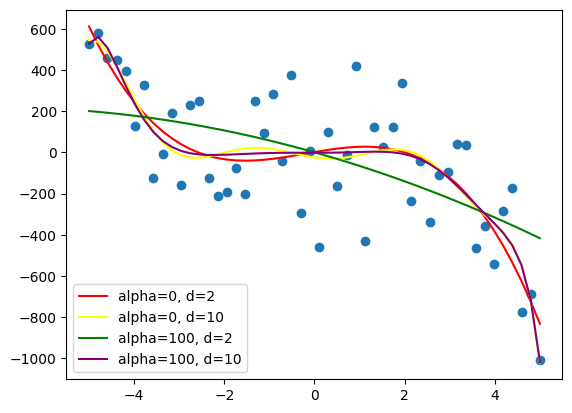

In [486]:
# Vaš kôd ovdje
#0,2 0,10 100,2 100,10
plt.scatter(skup_za_ucenje, skup_oznaka)
#1)
poly4c1 = PolynomialFeatures(degree=2, include_bias=False)
train_transformed1 = poly2.fit_transform(skup_za_ucenje)
model4c1 = Ridge(alpha=0.0)
model4c1.fit(train_transformed1,skup_oznaka)
predikcije4c1 = model4c1.predict(train_transformed1)
#2)
poly4c2 = PolynomialFeatures(degree=10, include_bias=False)
train_transformed2 = poly4c2.fit_transform(skup_za_ucenje)
model4c2 = Ridge(alpha=0.0)
model4c2.fit(train_transformed2,skup_oznaka)
predikcije4c2 = model4c2.predict(train_transformed2)
#3)
poly4c3 = PolynomialFeatures(degree=2, include_bias=False)
train_transformed3 = poly4c3.fit_transform(skup_za_ucenje)
model4c3 = Ridge(alpha=100.0)
model4c3.fit(train_transformed3,skup_oznaka)
predikcije4c3 = model4c3.predict(train_transformed3)
#4)
poly4c4 = PolynomialFeatures(degree=10, include_bias=False)
train_transformed4 = poly4c4.fit_transform(skup_za_ucenje)
model4c4 = Ridge(alpha=100.0)
model4c4.fit(train_transformed4,skup_oznaka)
predikcije4c4 = model4c4.predict(train_transformed2)

plt.plot(skup_za_ucenje, predikcije4c1, color="red", label="alpha=0, d=2")
plt.plot(skup_za_ucenje, predikcije4c2, color="yellow", label="alpha=0, d=10")
plt.plot(skup_za_ucenje, predikcije4c3, color="green", label="alpha=100, d=2")
plt.plot(skup_za_ucenje, predikcije4c4, color="purple", label="alpha=100, d=10")
plt.legend()
plt.show()





### (d)

Kao u zadataku 3b, razdvojite primjere na skup za učenje i skup za ispitivanje u omjeru 1:1. Prikažite krivulje logaritama pogreške učenja i ispitne pogreške u ovisnosti za model $\mathcal{H}_{d=10,\lambda}$, podešavajući faktor regularizacije $\lambda$ u rasponu $\lambda\in\{0,1,\dots,50\}$.

**Q:** Kojoj strani na grafikonu odgovara područje prenaučenosti, a kojoj podnaučenosti? Zašto?

**Q:** Koju biste vrijednosti za $\lambda$ izabrali na temelju ovih grafikona i zašto?


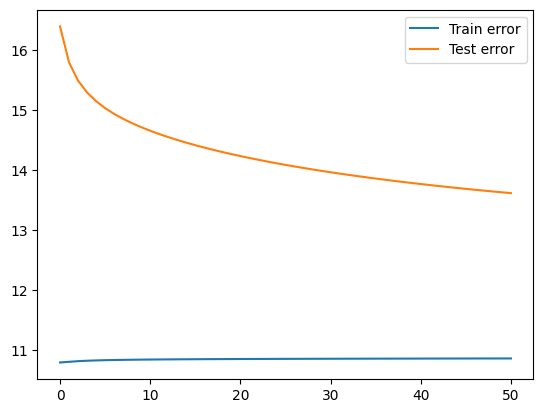

In [487]:
# Vaš kôd ovdje
X4d_train, X4d_test, y4d_train, y4d_test = train_test_split(skup_za_ucenje, skup_oznaka, test_size=0.5)
errors_train4d=[]
errors_test4d=[]
hyperparameters4d = np.arange(0,51)
for regfact in range(0,51):
    poly4d = PolynomialFeatures(degree=10, include_bias=False)
    X4d_train_transformed = poly4d.fit_transform(X4d_train)
    X4d_test_transformed = poly4d.fit_transform(X4d_test)

    model4dtrain = Ridge(alpha=regfact)
    model4dtrain.fit(X4d_train_transformed, y4d_train)
    predikcije_train4d = model4dtrain.predict(X4d_train_transformed)

    predikcije_test4d = model4dtrain.predict(X4d_test_transformed)

    pogreska_train4d = mean_squared_error(y4d_train, predikcije_train4d)
    pogreska_test4d = mean_squared_error(y4d_test, predikcije_test4d)
    
    errors_train4d.append(math.log(pogreska_train4d))
    errors_test4d.append(math.log(pogreska_test4d))

plt.plot(hyperparameters4d, errors_train4d, label="Train error")
plt.plot(hyperparameters4d, errors_test4d, label="Test error")
plt.legend()
plt.show()



### 5. L1-regularizacija i L2-regularizacija

Svrha regularizacije jest potiskivanje težina modela $\mathbf{w}$ prema nuli, kako bi model bio što jednostavniji. Složenost modela može se okarakterizirati normom pripadnog vektora težina $\mathbf{w}$, i to tipično L2-normom ili L1-normom. Za jednom trenirani model možemo izračunati i broj ne-nul značajki, ili L0-normu, pomoću sljedeće funkcije koja prima vektor težina $\mathbf{w}$:

In [488]:
def nonzeroes(coef, tol=1e-6): 
    return len(coef) - len(coef[np.isclose(0, coef, atol=tol)])

### (a)

Za ovaj zadatak upotrijebite skup za učenje i skup za testiranje iz zadatka 3b. Trenirajte modele **L2-regularizirane** polinomijalne regresije stupnja $d=5$, mijenjajući hiperparametar $\lambda$ u rasponu $\{1,2,\dots,100\}$. Za svaki od treniranih modela izračunajte L{0,1,2}-norme vektora težina $\mathbf{w}$ te ih prikažite kao funkciju od $\lambda$. Pripazite što točno šaljete u funkciju za izračun normi.

**Q:** Objasnite oblik obiju krivulja. Hoće li krivulja za $\|\mathbf{w}\|_2$ doseći nulu? Zašto? Je li to problem? Zašto?

**Q:** Za $\lambda=100$, koliki je postotak težina modela jednak nuli, odnosno koliko je model rijedak?

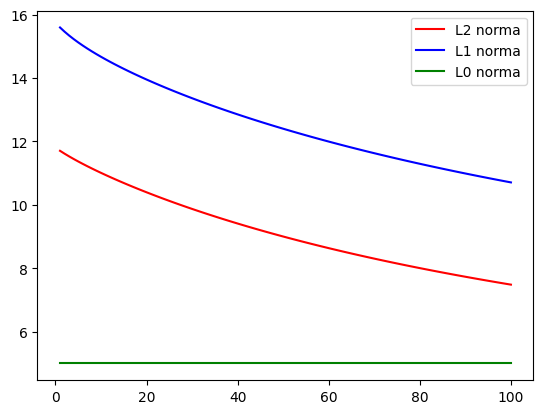

In [489]:
from sklearn.linear_model import Ridge
# Vaš kôd ovdje
#X_train, X_test, y_train, y_test

def L1(w):
    sum=0
    for wi in w:
        sum+=abs(wi)
    return(sum)

def L2(w):
    sum=0
    for wi in w:
        sum+=wi**2
    return sum**(1/2)

L2norme=[]
L1norme=[]
L0norme=[]

d = 5
lambdas = np.arange(1,101)
for l in lambdas:
    poly5a = PolynomialFeatures(degree=5, include_bias=False)
    X_train_5a = poly5a.fit_transform(X_train)
    X_test_5a = poly5a.fit_transform(X_test)

    model5a = Ridge(alpha=l)
    model5a.fit(X_train_5a, y_train)

    koeficijenti=[]
    koeficijenti.extend(model5a.coef_[0][1:])
    
    L2norme.append(L2(koeficijenti))
    L1norme.append(L1(koeficijenti))
    L0norme.append(nonzeroes(model5a.coef_[0]))

plt.plot(lambdas, L2norme, label="L2 norma", color="red")
plt.plot(lambdas, L1norme, label="L1 norma", color="blue")
plt.plot(lambdas, L0norme, label="L0 norma", color="green")
plt.legend()
plt.show()
    

    

### (b)

Glavna prednost L1-regularizirane regresije (ili *LASSO regression*) nad L2-regulariziranom regresijom jest u tome što L1-regularizirana regresija rezultira **rijetkim modelima** (engl. *sparse models*), odnosno modelima kod kojih su mnoge težine pritegnute na nulu. Pokažite da je to doista tako, ponovivši gornji eksperiment s **L1-regulariziranom** regresijom, implementiranom u klasi  [`Lasso`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html) u modulu [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model).

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


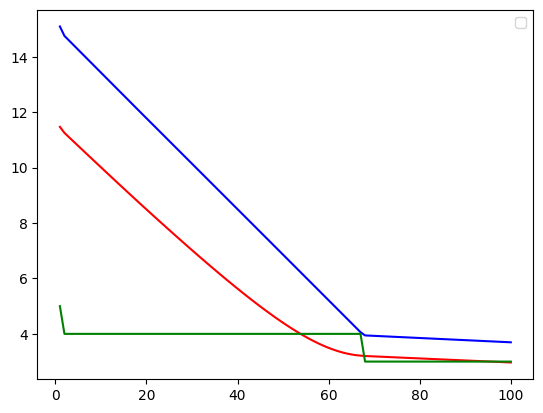

In [490]:
from sklearn.linear_model import Lasso
# Vaš kôd ovdje

L2norme5b=[]
L1norme5b=[]
L0norme5b=[]
d = 5
lambdas = np.arange(1,101)
for l in lambdas:
    poly5b = PolynomialFeatures(degree=5, include_bias=False)
    X_train_5b = poly5b.fit_transform(X_train)
    X_test_5b = poly5b.fit_transform(X_test)

    model5b = Lasso(alpha=l)
    model5b.fit(X_train_5b, y_train)

    koeficijenti5b=[]
    koeficijenti5b.extend(model5b.coef_[1:])
    
    L2norme5b.append(L2(koeficijenti5b))
    L1norme5b.append(L1(koeficijenti5b))
    L0norme5b.append(nonzeroes(model5b.coef_))


plt.plot(lambdas, L2norme5b, color='red')
plt.plot(lambdas, L1norme5b, color='blue')
plt.plot(lambdas, L0norme5b, color='green')
plt.legend()
plt.show()

### 6. Značajke različitih skala

Često se u praksi možemo susreti sa podatcima u kojima sve značajke nisu jednakih magnituda. Primjer jednog takvog skupa je regresijski skup podataka `grades` u kojem se predviđa prosjek ocjena studenta na studiju (1--5) na temelju dvije značajke: bodova na prijamnom ispitu (1--3000) i prosjeka ocjena u srednjoj školi. Prosjek ocjena na studiju izračunat je kao težinska suma ove dvije značajke uz dodani šum.

Koristite sljedeći kôd kako biste generirali ovaj skup podataka.

In [491]:
n_data_points = 500
np.random.seed(69)

# Generiraj podatke o bodovima na prijamnom ispitu koristeći normalnu razdiobu i ograniči ih na interval [1, 3000].
exam_score = np.random.normal(loc=1500.0, scale = 500.0, size = n_data_points) 
exam_score = np.round(exam_score)
exam_score[exam_score > 3000] = 3000
exam_score[exam_score < 0] = 0

# Generiraj podatke o ocjenama iz srednje škole koristeći normalnu razdiobu i ograniči ih na interval [1, 5].
grade_in_highschool = np.random.normal(loc=3, scale = 2.0, size = n_data_points)
grade_in_highschool[grade_in_highschool > 5] = 5
grade_in_highschool[grade_in_highschool < 1] = 1

# Matrica dizajna.
grades_X = np.array([exam_score,grade_in_highschool]).T

# Završno, generiraj izlazne vrijednosti.
rand_noise = np.random.normal(loc=0.0, scale = 0.5, size = n_data_points)
exam_influence = 0.9
grades_y = ((exam_score / 3000.0) * (exam_influence) + (grade_in_highschool / 5.0) \
            * (1.0 - exam_influence)) * 5.0 + rand_noise
grades_y[grades_y < 1] = 1
grades_y[grades_y > 5] = 5

### a)

Iscrtajte ovisnost ciljne vrijednosti (y-os) o prvoj i o drugoj značajki (x-os). Iscrtajte dva odvojena grafa.

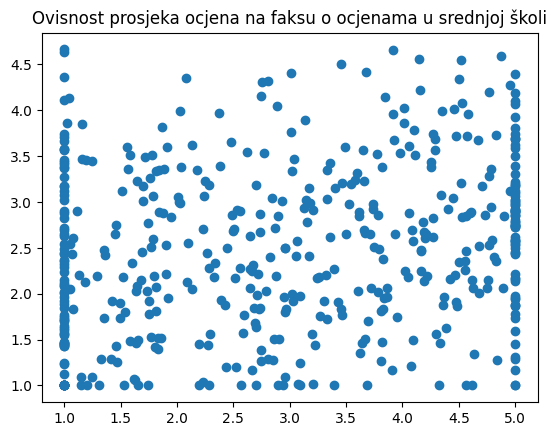

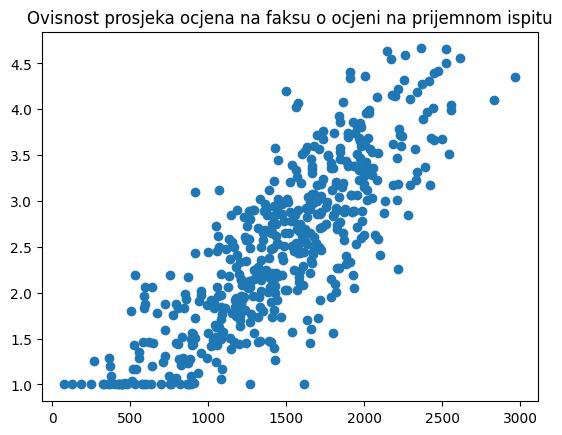

In [492]:
# Vaš kôd ovdje
plt.scatter(grade_in_highschool, grades_y)
plt.title("Ovisnost prosjeka ocjena na faksu o ocjenama u srednjoj školi")
plt.show()

plt.scatter(exam_score, grades_y)
plt.title("Ovisnost prosjeka ocjena na faksu o ocjeni na prijemnom ispitu")
plt.show()

### b)

Naučite model L2-regularizirane regresije ($\lambda = 0.01$), na podacima `grades_X` i `grades_y`:

In [493]:
# Vaš kôd ovdje
model6b = Ridge(alpha=0.01)
model6b.fit(grades_X, grades_y)
print(model6b.coef_)

[0.00141497 0.09477276]


Sada ponovite gornji eksperiment, ali prvo skalirajte podatke `grades_X` i `grades_y` i spremite ih u varijable `grades_X_fixed` i `grades_y_fixed`. Za tu svrhu, koristite [`StandardScaler`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).

In [494]:
from sklearn.preprocessing import StandardScaler
# Vaš kôd ovdje
ScalarForX = StandardScaler()
ScalarFory = StandardScaler()

grades_X_fixed = ScalarForX.fit_transform(grades_X)
grades_y_fixed = ScalarFory.fit_transform(grades_y.reshape(-1,1))
model6b = Ridge(alpha=0.01)
model6b.fit(grades_X_fixed, grades_y_fixed)

print(model6b.coef_)

[[0.81630375 0.15167761]]


**Q:** Gledajući grafikone iz podzadatka (a), koja značajka bi trebala imati veću magnitudu, odnosno važnost pri predikciji prosjeka na studiju? Odgovaraju li težine Vašoj intuiciji? Objasnite.  

### 7. Multikolinearnost

### a)

Izradite skup podataka `grades_X_fixed_colinear` tako što ćete u skupu `grades_X_fixed` iz
zadatka *7b* duplicirati zadnji stupac (ocjenu iz srednje škole). Time smo efektivno uveli savršenu multikolinearnost.

In [495]:
# Vaš kôd ovdje
#print(grades_X_fixed)
grades_X_fixed_colinear = np.column_stack([grades_X_fixed, grades_X_fixed[:, -1]])

Ponovno, naučite na ovom skupu L2-regularizirani model regresije ($\lambda = 0.01$).

In [496]:
# Vaš kôd ovdje
model7a = Ridge(alpha=0.01)
model7a.fit(grades_X_fixed_colinear, grades_y_fixed)
print(model7a.coef_)
print(model6b.coef_)


[[0.81630364 0.07583957 0.07583957]]
[[0.81630375 0.15167761]]


**Q:** Usporedite iznose težina s onima koje ste dobili u zadatku *7b*. Što se dogodilo?

### b)

Slučajno uzorkujte 50% elemenata iz skupa `grades_X_fixed_colinear` i naučite dva modela L2-regularizirane regresije, jedan s $\lambda=0.01$ i jedan s $\lambda=1000$). Ponovite ovaj pokus 10 puta (svaki put s drugim podskupom od 50% elemenata).  Za svaki model, ispišite dobiveni vektor težina u svih 10 ponavljanja te ispišite standardnu devijaciju vrijednosti svake od težina (ukupno šest standardnih devijacija, svaka dobivena nad 10 vrijednosti).

In [497]:
# Vaš kôd ovdje
w1A=[]
w1B=[]
w2A=[]
w2B=[]
w3A=[]
w3B=[]
for i in range(1,11):
    random_X, _ , random_y, _ = train_test_split(grades_X_fixed_colinear, grades_y, test_size=0.5)
    modelA = Ridge(alpha=0.01)
    modelB = Ridge(alpha=1000.0)
    modelA.fit(random_X, random_y)
    modelB.fit(random_X, random_y)
    print("Iteracija broj {}:".format(i))
    print("Težine modela A: {}".format(modelA.coef_))
    print("Težine modela B: {}".format(modelB.coef_))
    print("------------")
    w1A.append(modelA.coef_[0])
    w2A.append(modelA.coef_[1])
    w3A.append(modelA.coef_[2])
    w1B.append(modelB.coef_[0])
    w2B.append(modelB.coef_[1])
    w3B.append(modelB.coef_[2])
print(np.std(w1A))
print(np.std(w2A))
print(np.std(w3A))
print(np.std(w1B))
print(np.std(w2B))
print(np.std(w3B))
    


Iteracija broj 1:
Težine modela A: [0.71920557 0.05892704 0.05892704]
Težine modela B: [0.14890855 0.0345435  0.0345435 ]
------------
Iteracija broj 2:
Težine modela A: [0.73147134 0.06895112 0.06895112]
Težine modela B: [0.14488565 0.02188302 0.02188302]
------------
Iteracija broj 3:
Težine modela A: [0.73760284 0.06951859 0.06951859]
Težine modela B: [0.14611719 0.02461645 0.02461645]
------------
Iteracija broj 4:
Težine modela A: [0.75435652 0.06779841 0.06779841]
Težine modela B: [0.15020984 0.03085084 0.03085084]
------------
Iteracija broj 5:
Težine modela A: [0.72238097 0.07260145 0.07260145]
Težine modela B: [0.14226771 0.02414177 0.02414177]
------------
Iteracija broj 6:
Težine modela A: [0.74149514 0.0409969  0.0409969 ]
Težine modela B: [0.16156482 0.02888502 0.02888502]
------------
Iteracija broj 7:
Težine modela A: [0.72555863 0.05567666 0.05567666]
Težine modela B: [0.14100268 0.02036078 0.02036078]
------------
Iteracija broj 8:
Težine modela A: [0.73579711 0.060231

**Q:** Kako regularizacija utječe na stabilnost težina?  
**Q:** Jesu li koeficijenti jednakih magnituda kao u prethodnom pokusu? Objasnite zašto.